In [1]:
import os
import numpy as np
import imageio
from scipy.optimize import brenth
import numba as nb
import matplotlib.pyplot as plt
from tqdm import tqdm
import matplotlib.gridspec as gridspec
import matplotlib.colors as mtlcl
import matplotlib.cm as cm
import itertools
import pickle as pickle
import seaborn as sns
from scipy.integrate import odeint

# Stage 2 of Model

How many rows of cells? 9
How many columns of cells? 9
How many iterations? 100


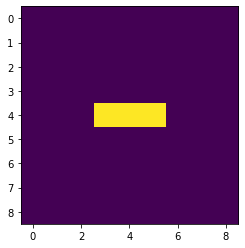

1


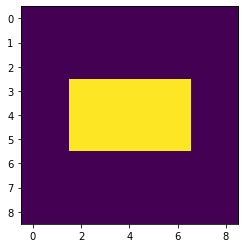

2


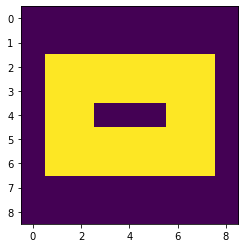

3


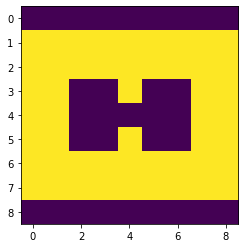

4


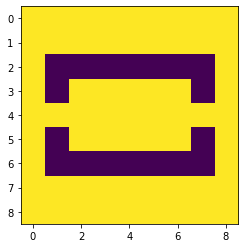

5


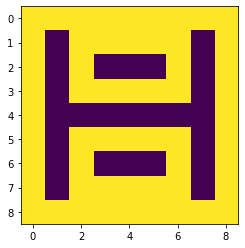

6


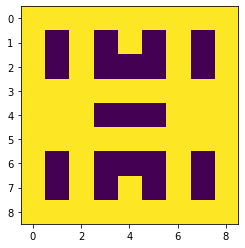

7


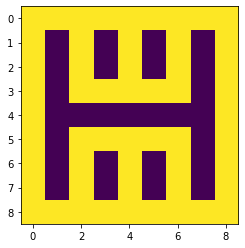

8


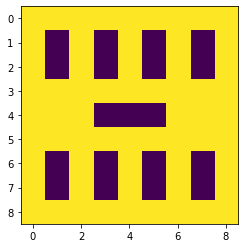

9


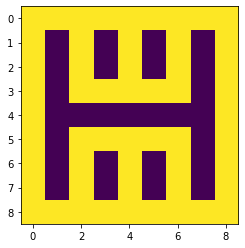

10


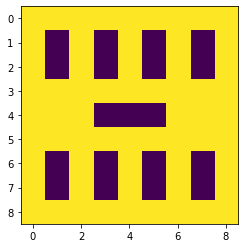

11


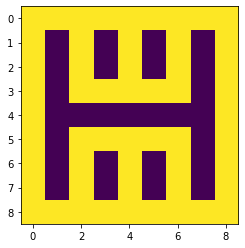

12


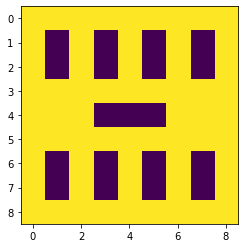

13


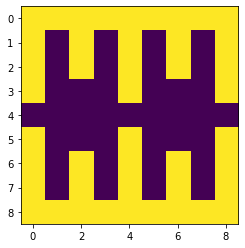

14


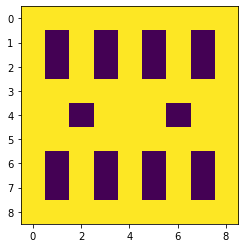

15


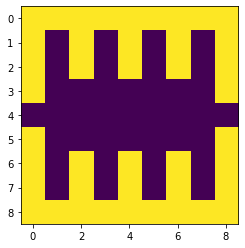

16


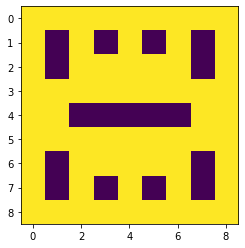

17


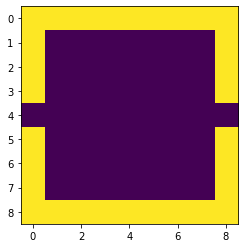

18


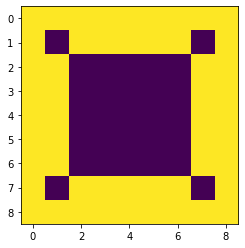

19


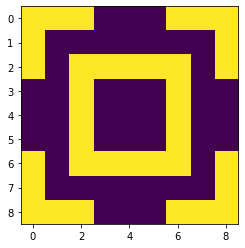

20


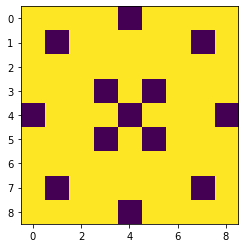

21


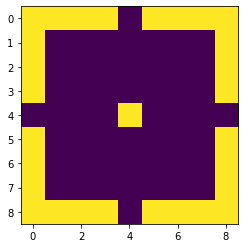

22


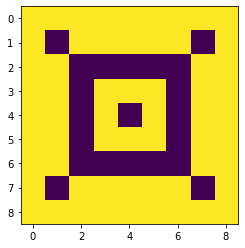

23


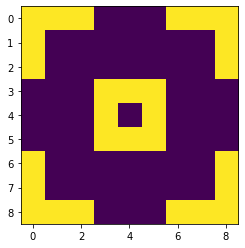

24


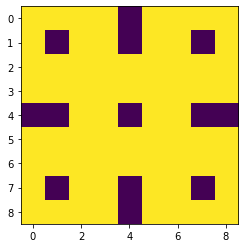

25


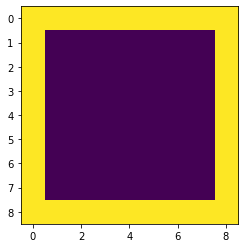

26


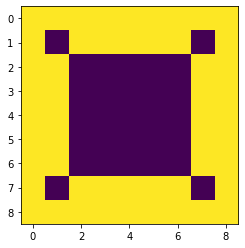

27


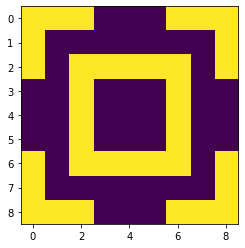

28


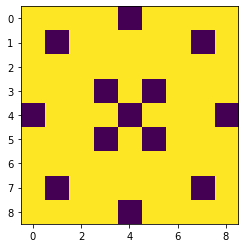

29


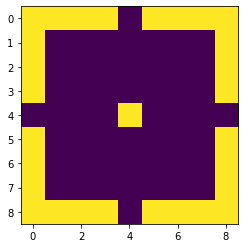

30


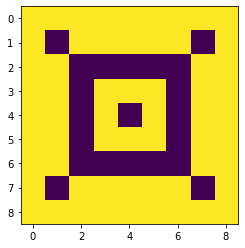

31


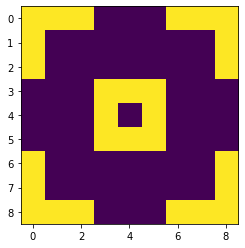

32


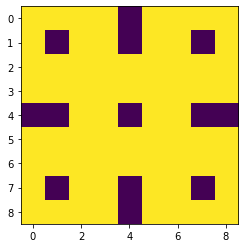

33


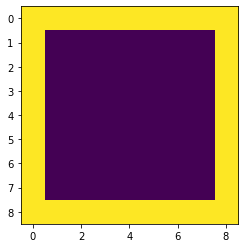

34


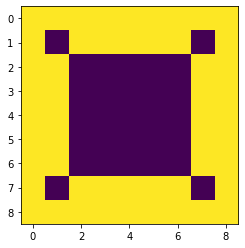

35


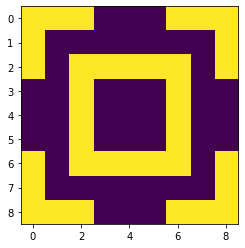

36


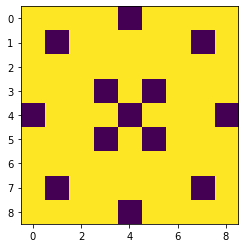

37


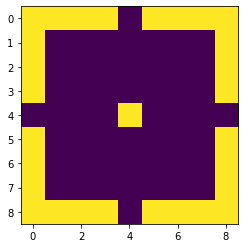

38


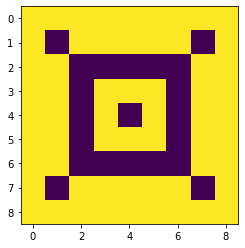

39


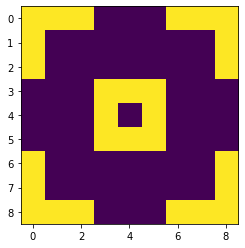

40


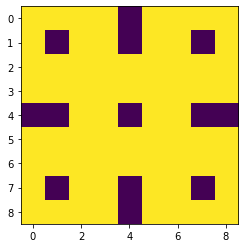

41


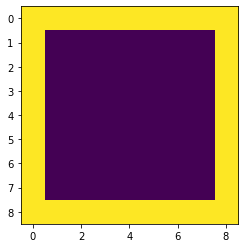

42


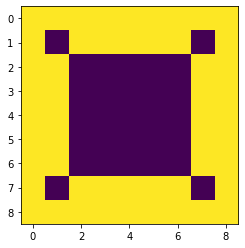

43


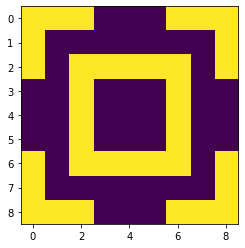

44


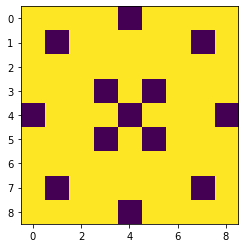

45


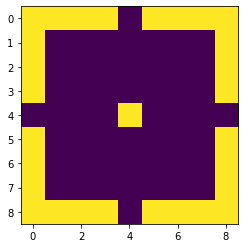

46


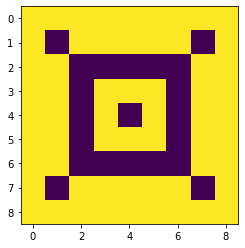

47


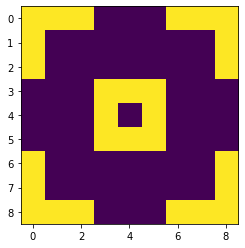

48


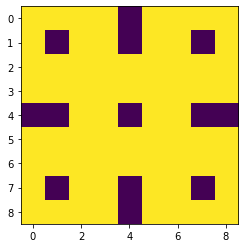

49


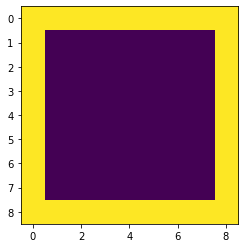

50


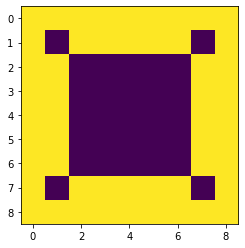

51


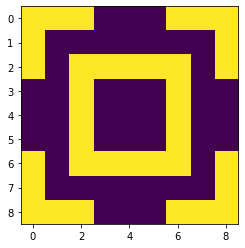

52


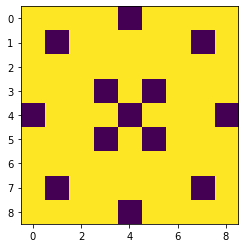

53


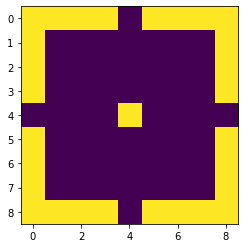

54


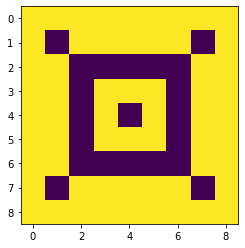

55


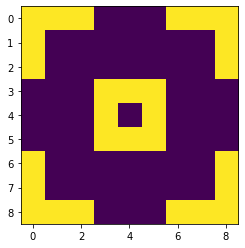

56


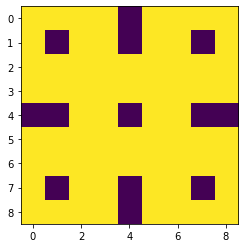

57


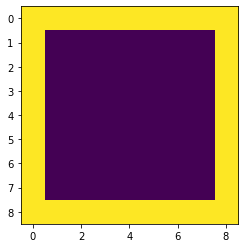

58


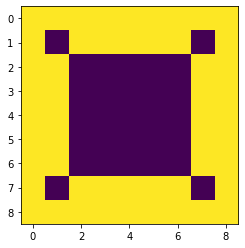

59


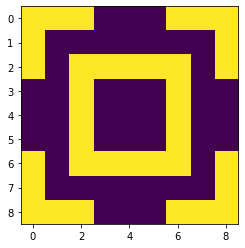

60


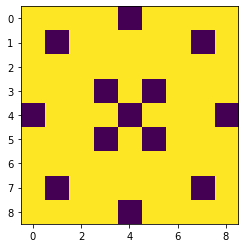

61


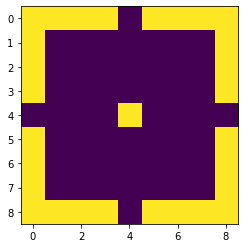

62


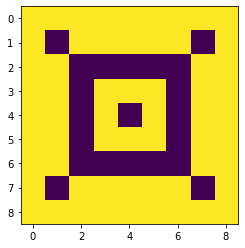

63


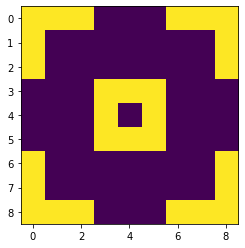

64


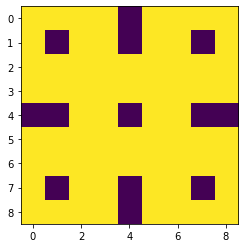

65


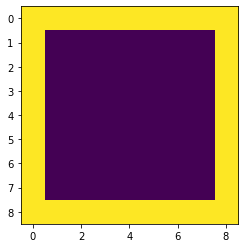

66


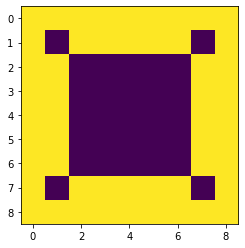

67


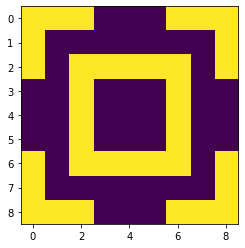

68


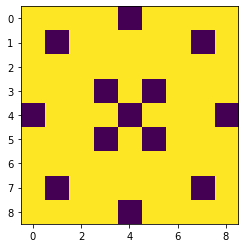

69


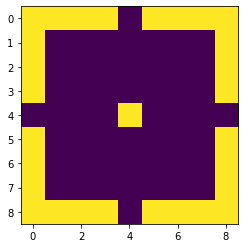

70


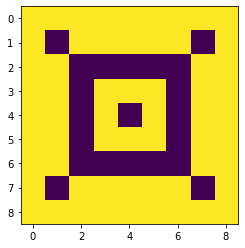

71


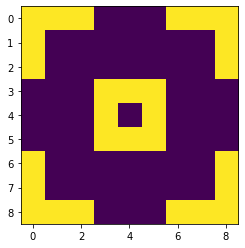

72


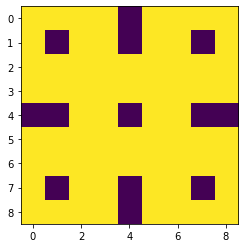

73


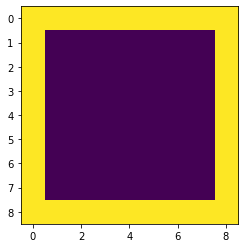

74


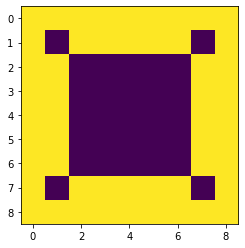

75


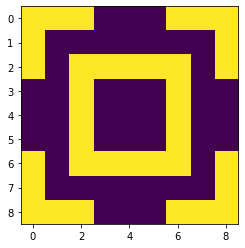

76


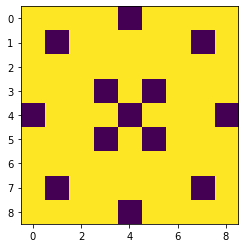

77


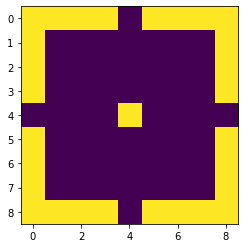

78


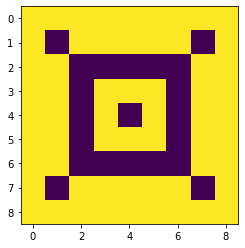

79


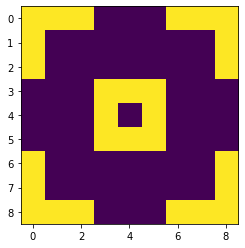

80


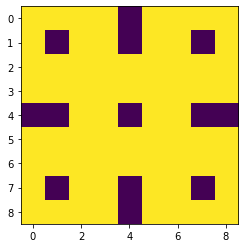

81


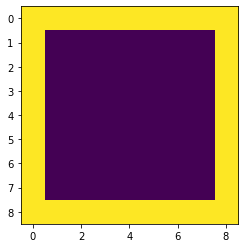

82


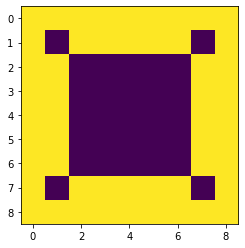

83


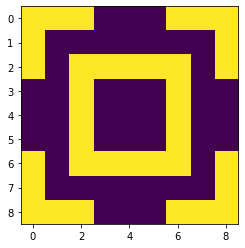

84


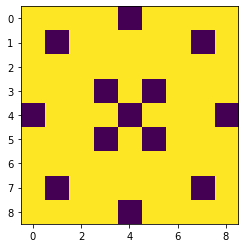

85


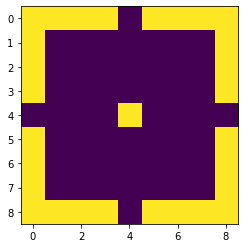

86


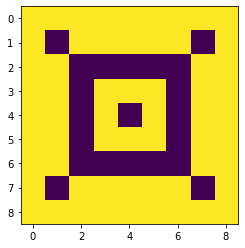

87


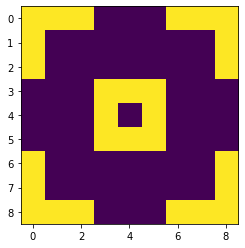

88


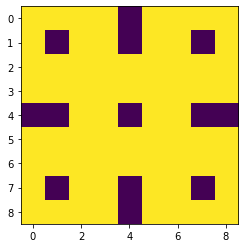

89


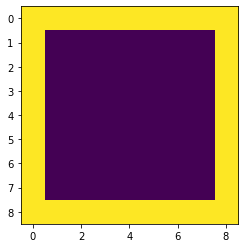

90


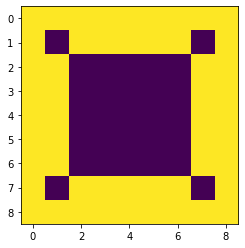

91


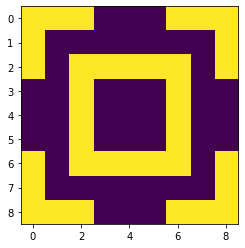

92


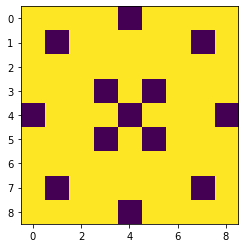

93


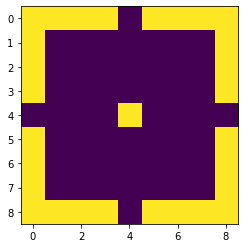

94


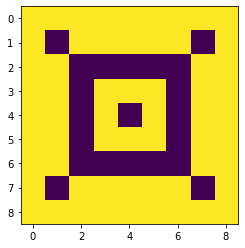

95


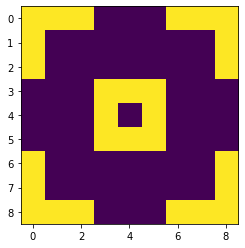

96


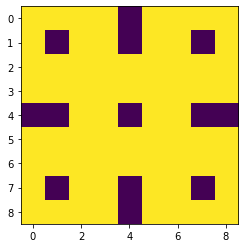

97


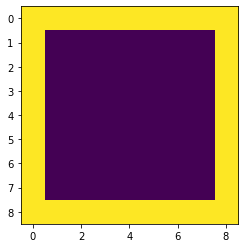

98


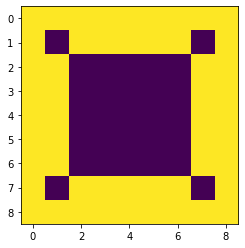

99


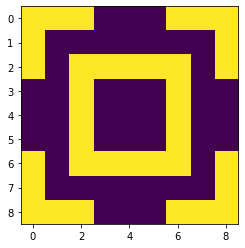

100


In [4]:
rows = int(input("How many rows of cells? "))
cols = int(input("How many columns of cells? "))
itns = int(input("How many iterations? "))

filenames = []

q = (rows, cols)


# choose initial grid configuration:

grid = np.zeros(q) # initialise grid of zeros for adding custom configs

on_cells = [(4,3),(4,4),(4,5)] # set indices of blinker
# # on_cells = [(3,1),(3,2),(3,3),(2,3),(1,2)] # or set indices of glider

for c in on_cells: 
    grid[c] = 1 # set these chosen cells to ON in initial grid

# grid = np.random.randint(2, size=q) # or switch off all the code above and just use this to generate random config


def func(x, t):
    u, v = x
    dudt = (p0 * ((p1+(R1 * (S**2 / (K1**2 + S**2))))/(1+p1+(R1 * (S**2 / (K1**2 + S**2))) + k*v**2))) - du*u
    dvdt = (p2 * ((p3+(R2 * (S**2 / (K2**2 + S**2))))/(1+p3+(R2 * (S**2 / (K2**2 + S**2))) + k*u**2 + k*v**2))) - dv*v
    dxdt = [dudt, dvdt]
    return dxdt

p0 = 288.9950 * 100
p1 = 50.9608 
p2 = 167.1198 * 100
p3 = p1
k = 0.06
R1 = 295.5976
R2 = 295.2462
K1 = 10.0259
K2 = 143.5996
du = 1 * 100
dv = 0.12 * 100
x0 = [0,0]
t = np.linspace(0,itns,itns*10+1)

for g in range(itns):
    grid_new = grid
    q = (rows,cols)
    score_grid = np.zeros(q)

    filename = f'{g}.png'
    filenames.append(filename)
    
    plt.figure()
    plt.imshow(grid)
    plt.savefig(filename)
    plt.show()
    plt.close()
    print(g+1)
    
    neighbors = lambda x, y : [(x2, y2) for x2 in range(x-1, x+2)
                                   for y2 in range(y-1, y+2)
                                   if (-1 < x <= rows and
                                       -1 < y <= cols and
                                       (x != x2 or y != y2) and
                                       (0 <= x2 <= rows-1) and
                                       (0 <= y2 <= cols-1))]
    
    for i in range(rows):
        for j in range(cols):
        
            score = 0
            for n in neighbors(i,j):
                val = grid[n]
                score += val # score = number of neighbours
                
            score_grid[i,j] = score
        
#     print(score_grid)
    
    for i in range(rows):
        for j in range(cols):
            
            S = 12.5 * score_grid[i,j] # signal value = number of neighbours * 12.5 (as 8 total possible)
            sol = odeint(func, x0, t)
#             print(sol) # to check how the expression levels change with each time step 
            
            u_exps = sol[:, 0]
            v_exps = sol[:, 1]
            
            u_exp = u_exps[g+1]
            v_exp = v_exps[g+1]
            
            if u_exp >= 162.5:
                grid_new[i,j] = 1
            else: grid_new[i,j] = 0
            
    grid = grid_new
    
with imageio.get_writer('mygif1.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        
for filename in set(filenames):
    os.remove(filename)   